In [2]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

In [3]:
diamonds = pd.read_csv("../Data/Diamonds Prices2022.csv")

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Fitting a Regression in sklearn

In [26]:
from sklearn.linear_model import LinearRegression

X = diamonds[["carat"]]
y = diamonds["price"]

lr = LinearRegression().fit(X, y)

print(f"Intercept: {lr.intercept_}")
print(f"Coefficients: {lr.coef_}")


Intercept: -2256.3950475375823
Coefficients: [7756.43615951]


### Fitting a Regression in Statsmodels

In [11]:
X = sm.add_constant(diamonds["carat"])
y = diamonds["price"]

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:03:41   Log-Likelihood:            -4.7276e+05
No. Observations:               53943   AIC:                         9.455e+05
Df Residuals:                   53941   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3950     13.055   -172.840      0.000   -2281.983   -2230.807
carat       7756.4362     14.066    551.423      0.000    7728.866    7784.006
==============================================================================
Omnibus:                    14027.005   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153060.389
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.036   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Making Predictions

In [18]:
model.predict([1, 2])

array([13256.47727148])

In [13]:
new_diamonds = pd.DataFrame({"carat": [0, .1, .3, .5, 1, 2, 3, 5]})

In [14]:
model.predict(sm.add_constant(new_diamonds))

0    -2256.395048
1    -1480.751432
2       70.535800
3     1621.823032
4     5500.041112
5    13256.477271
6    21012.913431
7    36525.785750
dtype: float64

### Residual Plot

<Axes: >

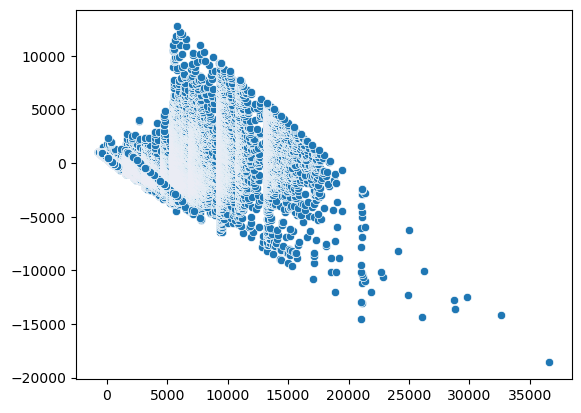

In [27]:
import seaborn as sns

sns.scatterplot(x=model.predict(), y=model.resid)